In [1]:
import h5py
import matplotlib_inline
import numpy as np
import time

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm

from smml.kernels import GaussianKernel, PolynomialKernel
from smml.models import MulticlassPegasos, Pegasos
from smml.cross_validation import (
    KFoldCrossValidation, ParamGridCrossValidation
)
from smml.utils import (
    plot_class_counts, plot_digits, plot_heatmap, 
    plot_runtime_comparison, plot_tsne_data
)

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [2]:
PATH = '../../datasets/usps/usps.h5'
with h5py.File(PATH, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]

X = np.concatenate((X_tr, X_te))
y = np.concatenate((y_tr, y_te))

# Dataset overview

In [ ]:
plot_digits(X, y, 10)

In [ ]:
plot_class_counts(y)

In [ ]:
plot_tsne_data(X, y)

# Runtime comparison

In [ ]:
def naive_training(X, y, kernel, T, l=0.1, seed=42):
    alphas = np.zeros(X.shape[0])
    rng = np.random.default_rng(seed)
    for t in range(1, T + 1):
        i = rng.integers(X.shape[0])
        s = np.sum(
            [alphas[j] * y[j] * kernel(X[i], X[j])
                for j in range(X.shape[0])])
        if (y[i] / (l * t)) * s < 1:
            alphas[i] += 1

    return alphas

def optimized_training(X, y, kernel, T, l=0.1, seed=42):
    alphas = np.zeros(X.shape[0])
    rng = np.random.default_rng(seed)
    K = kernel.compute_kernel_matrix(X, X)

    for t in range(1, T + 1):
        i = rng.integers(X.shape[0])
        s = (alphas * y).dot(K[i])
        if (y[i] / (l * t)) * s < 1:
            alphas[i] += 1

    return alphas

In [ ]:
N = 1000
X = np.random.rand(N, 10)
y = np.random.randint(2, size=N)
kernel = GaussianKernel()
Ts = np.linspace(100, 10000, 10, dtype=int)

times = {
    'naive': [],
    'optimized': []
}

for T in tqdm(Ts, leave=False):
    start = time.process_time()
    res1 = naive_training(X, y, kernel, T)
    times['naive'].append(time.process_time() - start)
    start = time.process_time()
    res2 = optimized_training(X, y, kernel, T)
    times['optimized'].append(time.process_time() - start)
    assert np.allclose(res1, res2)

In [ ]:
plot_runtime_comparison(Ts, times)

# Cross-validation experiments

In [23]:
cv = KFoldCrossValidation(5)
param_grid = {'T': [1000, 5000, 10000, 25000, 50000], 
              'l': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}

## Polynomial kernel (degree 2)

In [24]:
mp = MulticlassPegasos(kernel=PolynomialKernel(n=2))
pgcv = ParamGridCrossValidation(mp, param_grid, cv)
res = pgcv.fit(X, y)

Looping on parameters grid: 100%|██████████| 35/35 [12:48<00:00, 21.97s/it]


In [26]:
with open(r'poly_2.txt','w+') as f:
    f.write(str(res))

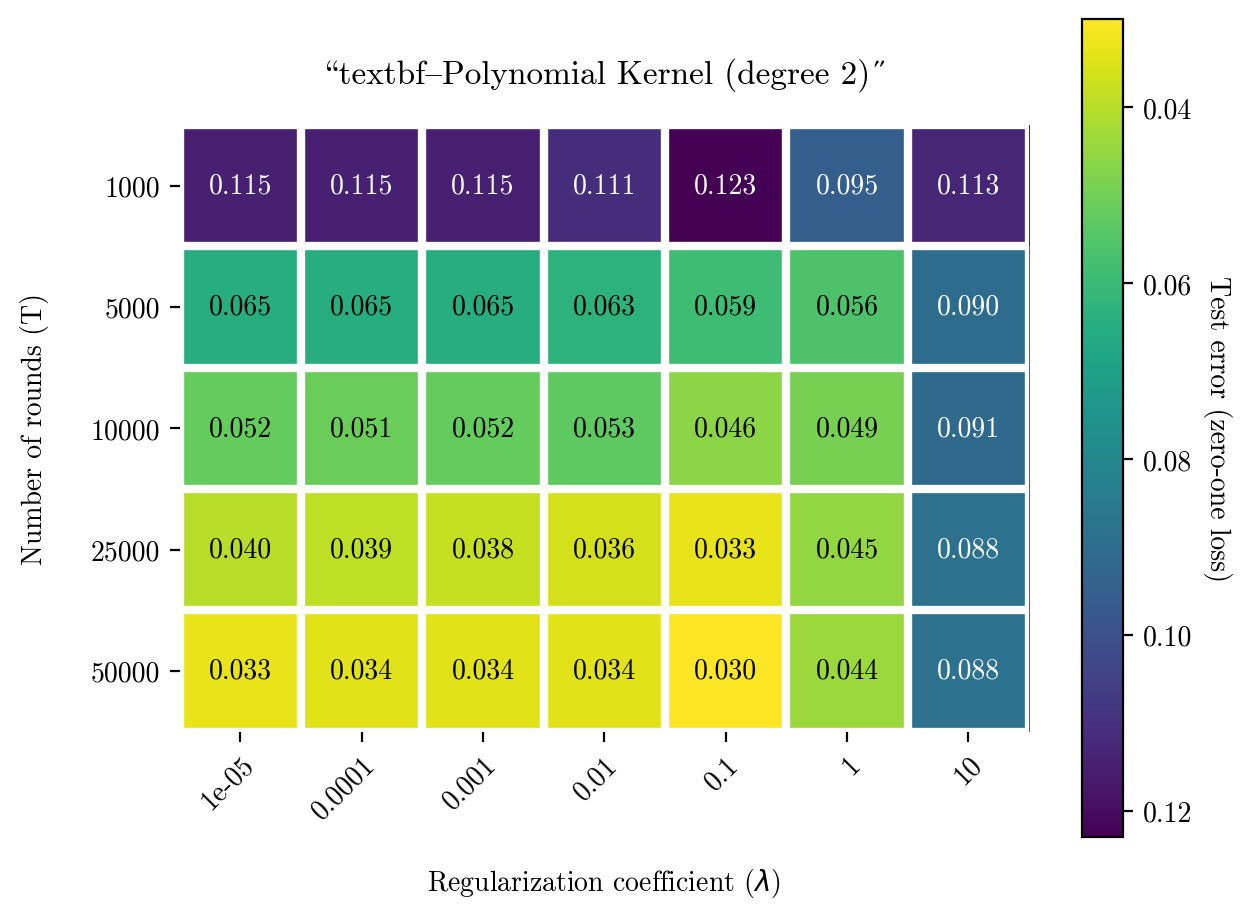

In [27]:
res = ''
with open(r'poly_2.txt','r') as f:
     for i in f.readlines():
         res=i
res = eval(res)

plot_heatmap(
     np.array([val['error'] for val in res.values()]).round(3), 
     param_grid, r'\textbf{Polynomial Kernel (degree 2)}', 
     r'Regularization coefficient ($\lambda$)', 'Number of rounds (T)',
     'Test error (zero-one loss)', 'img/poly_2_error.png')

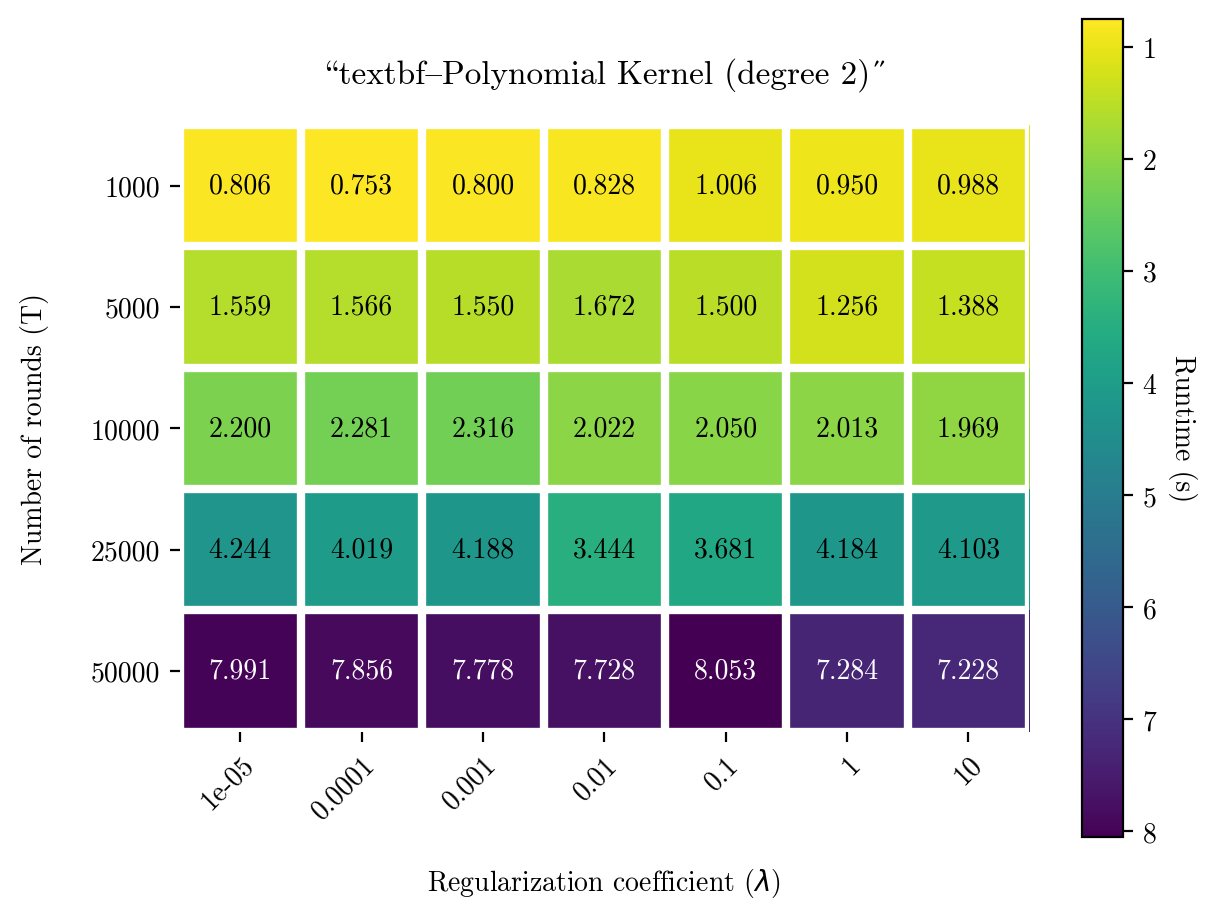

In [28]:
res = ''
with open(r'poly_2.txt','r') as f:
     for i in f.readlines():
         res=i
res = eval(res)

plot_heatmap(
     np.array([val['time'] for val in res.values()]).round(3), 
     param_grid, r'\textbf{Polynomial Kernel (degree 2)}', 
     r'Regularization coefficient ($\lambda$)', 'Number of rounds (T)', 
    'Runtime (s)','img/poly_2_time.png')

## Polynomial kernel (degree 3)

In [29]:
mp = MulticlassPegasos(kernel=PolynomialKernel(n=3))
pgcv = ParamGridCrossValidation(mp, param_grid, cv)
res = pgcv.fit(X, y)

Looping on parameters grid: 100%|██████████| 35/35 [14:15<00:00, 24.43s/it]


In [30]:
with open(r'poly_3.txt','w+') as f:
    f.write(str(res))

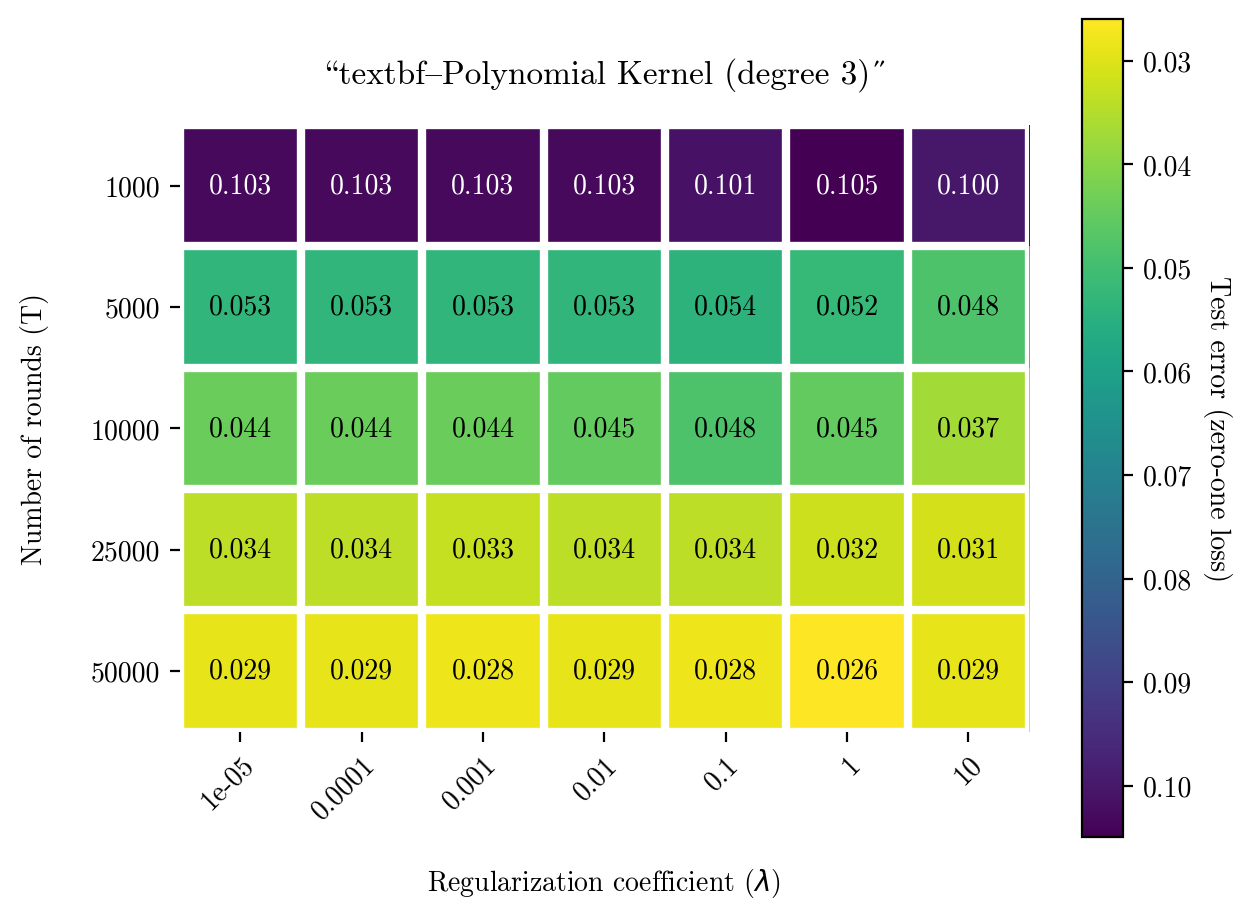

In [31]:
res = ''
with open(r'poly_3.txt','r') as f:
     for i in f.readlines():
         res=i
res = eval(res)

plot_heatmap(
     np.array([val['error'] for val in res.values()]).round(3), 
     param_grid, r'\textbf{Polynomial Kernel (degree 3)}', 
     r'Regularization coefficient ($\lambda$)', 'Number of rounds (T)',
     'Test error (zero-one loss)', 'img/poly_3_error.png')

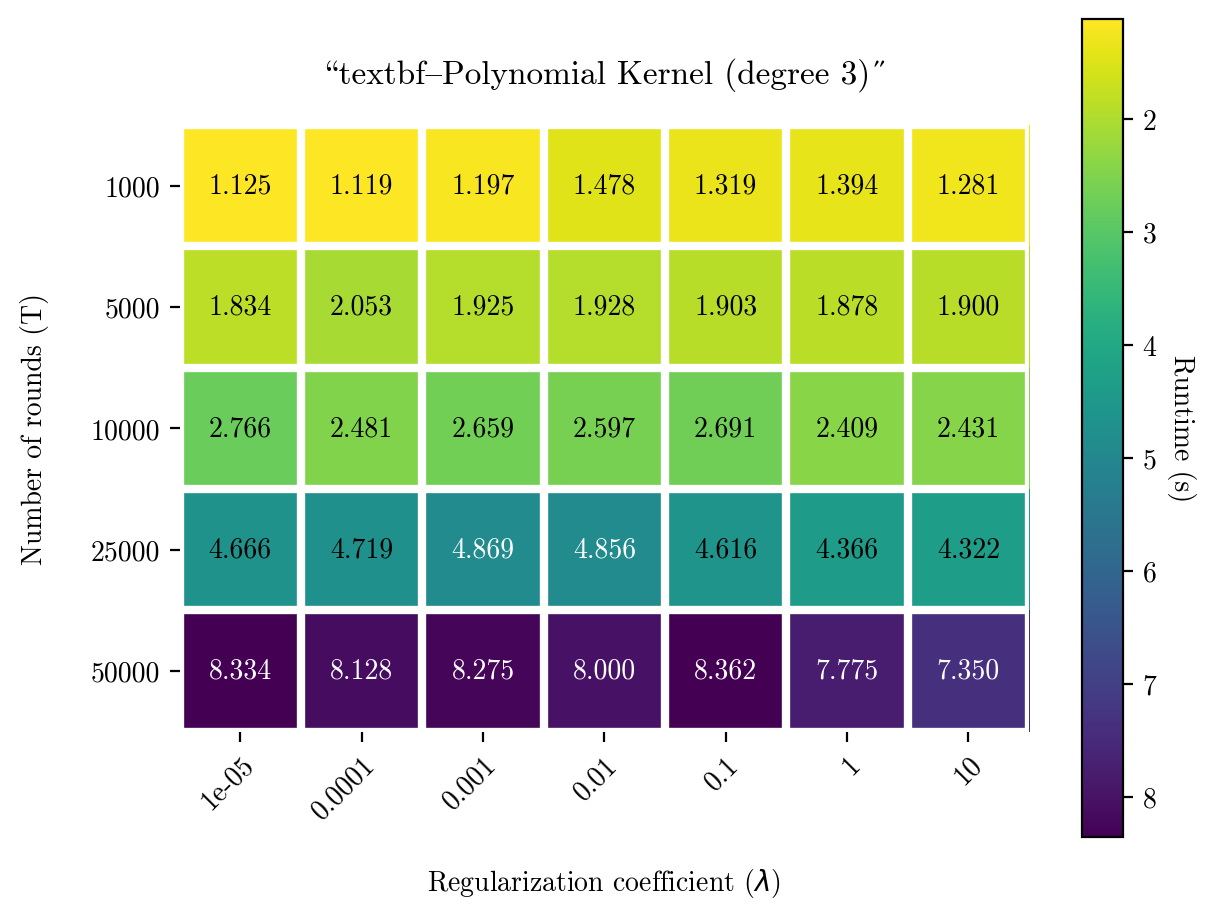

In [32]:
res = ''
with open(r'poly_3.txt','r') as f:
     for i in f.readlines():
         res=i
res = eval(res)

plot_heatmap(
     np.array([val['time'] for val in res.values()]).round(3), 
     param_grid, r'\textbf{Polynomial Kernel (degree 3)}', 
     r'Regularization coefficient ($\lambda$)', 'Number of rounds (T)', 
    'Runtime (s)','img/poly_3_time.png')

## Polynomial kernel (degree 4)

In [33]:
mp = MulticlassPegasos(kernel=PolynomialKernel(n=4))
pgcv = ParamGridCrossValidation(mp, param_grid, cv)
res = pgcv.fit(X, y)

Looping on parameters grid: 100%|██████████| 35/35 [14:20<00:00, 24.57s/it]


In [34]:
with open(r'poly_4.txt','w+') as f:
    f.write(str(res))

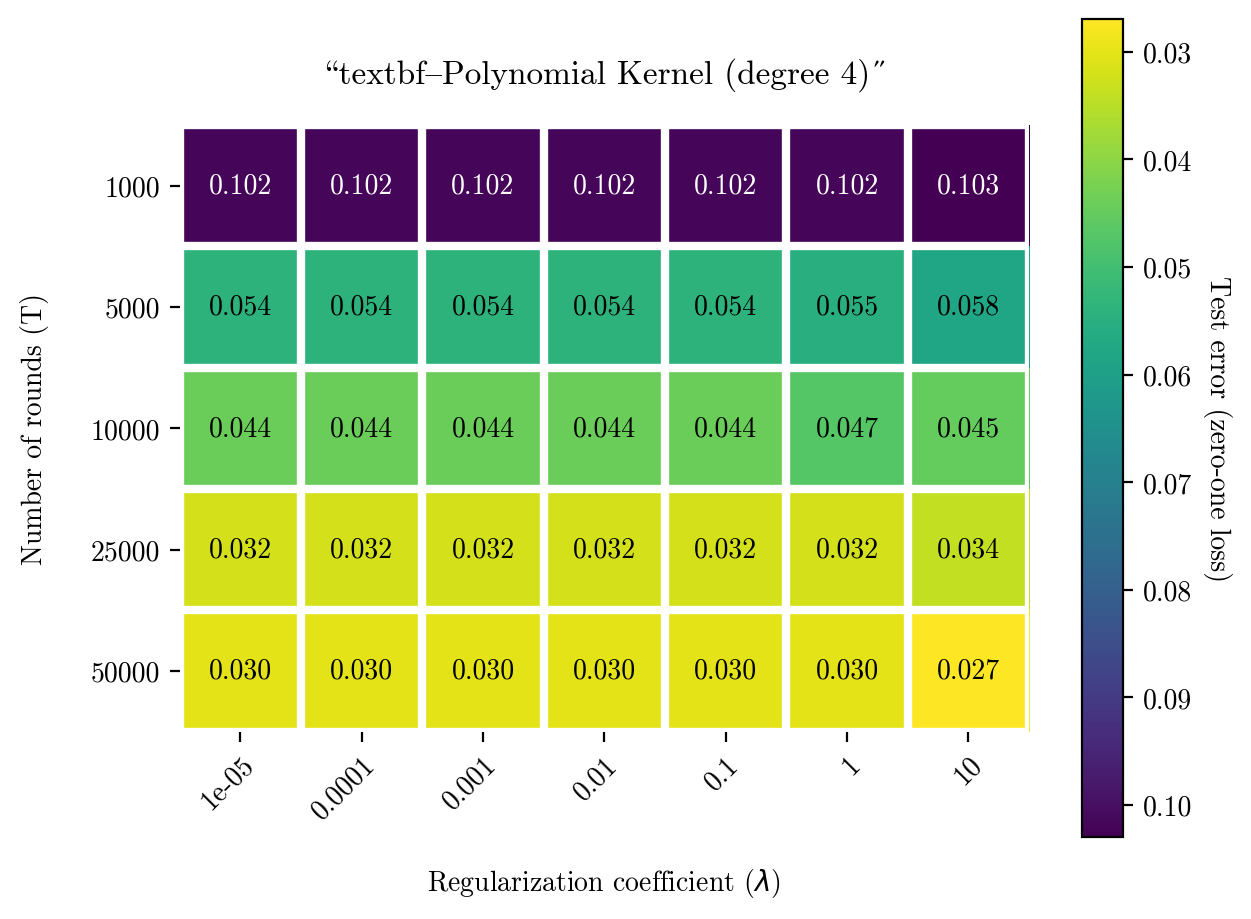

In [35]:
res = ''
with open(r'poly_4.txt','r') as f:
     for i in f.readlines():
         res=i
res = eval(res)

plot_heatmap(
     np.array([val['error'] for val in res.values()]).round(3), 
     param_grid, r'\textbf{Polynomial Kernel (degree 4)}', 
     r'Regularization coefficient ($\lambda$)', 'Number of rounds (T)',
     'Test error (zero-one loss)', 'img/poly_4_error.png')

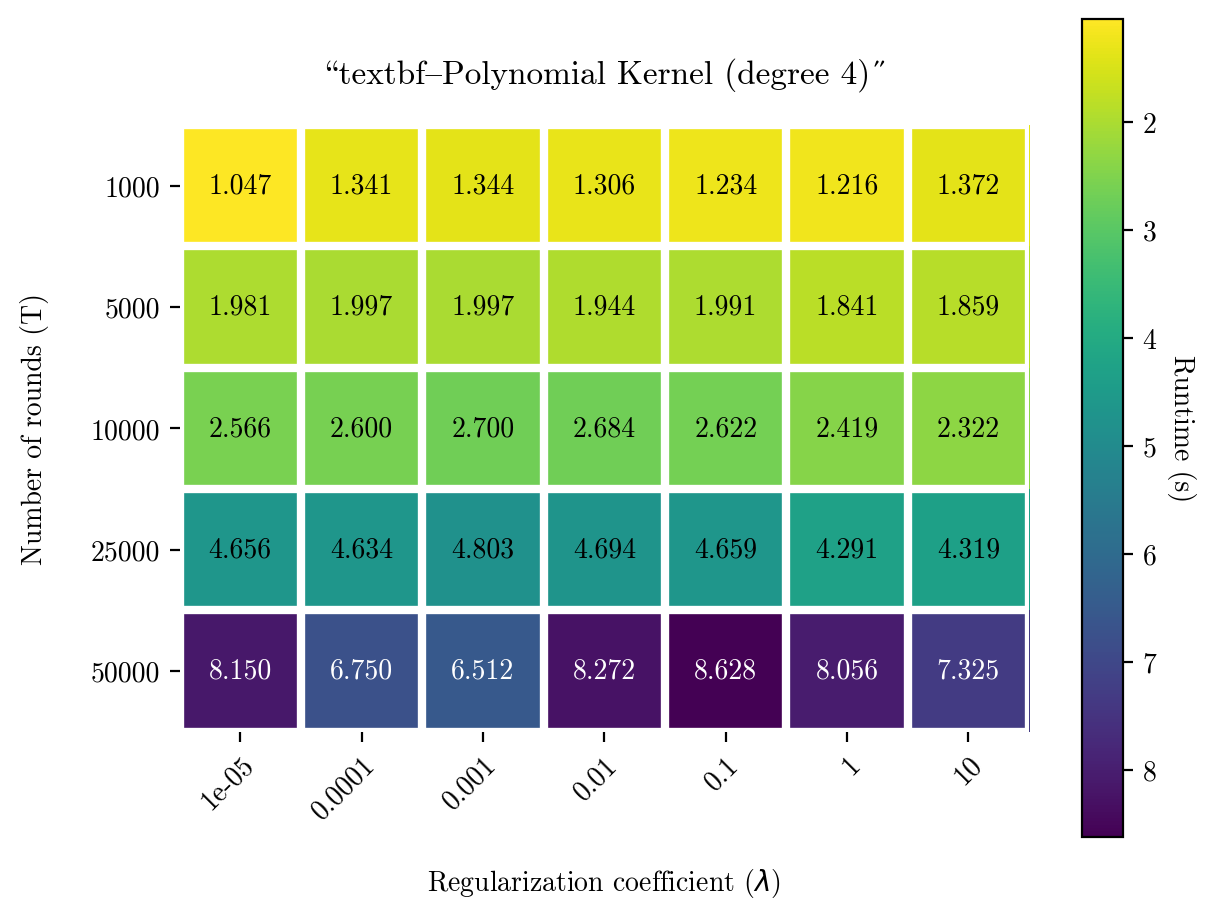

In [36]:
res = ''
with open(r'poly_4.txt','r') as f:
     for i in f.readlines():
         res=i
res = eval(res)

plot_heatmap(
     np.array([val['time'] for val in res.values()]).round(3), 
     param_grid, r'\textbf{Polynomial Kernel (degree 4)}', 
     r'Regularization coefficient ($\lambda$)', 'Number of rounds (T)', 
    'Runtime (s)','img/poly_4_time.png')

## Polynomial kernel (degree 7)

In [37]:
mp = MulticlassPegasos(kernel=PolynomialKernel(n=7))
pgcv = ParamGridCrossValidation(mp, param_grid, cv)
res = pgcv.fit(X, y)

Looping on parameters grid: 100%|██████████| 35/35 [14:23<00:00, 24.66s/it]


In [38]:
with open(r'poly_7.txt','w+') as f:
    f.write(str(res))

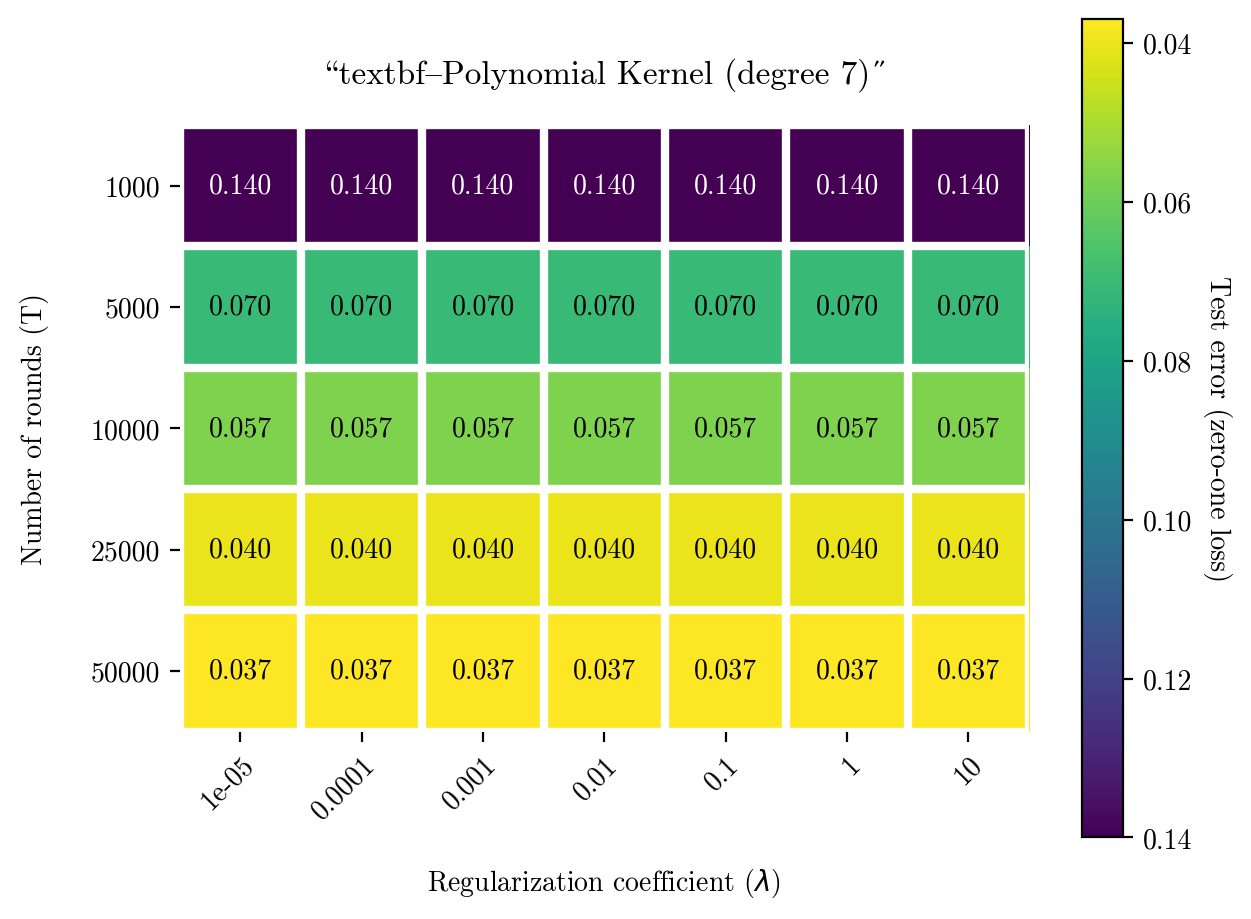

In [39]:
res = ''
with open(r'poly_7.txt','r') as f:
     for i in f.readlines():
         res=i
res = eval(res)

plot_heatmap(
     np.array([val['error'] for val in res.values()]).round(3), 
     param_grid, r'\textbf{Polynomial Kernel (degree 7)}', 
     r'Regularization coefficient ($\lambda$)', 'Number of rounds (T)',
     'Test error (zero-one loss)', 'img/poly_7_error.png')

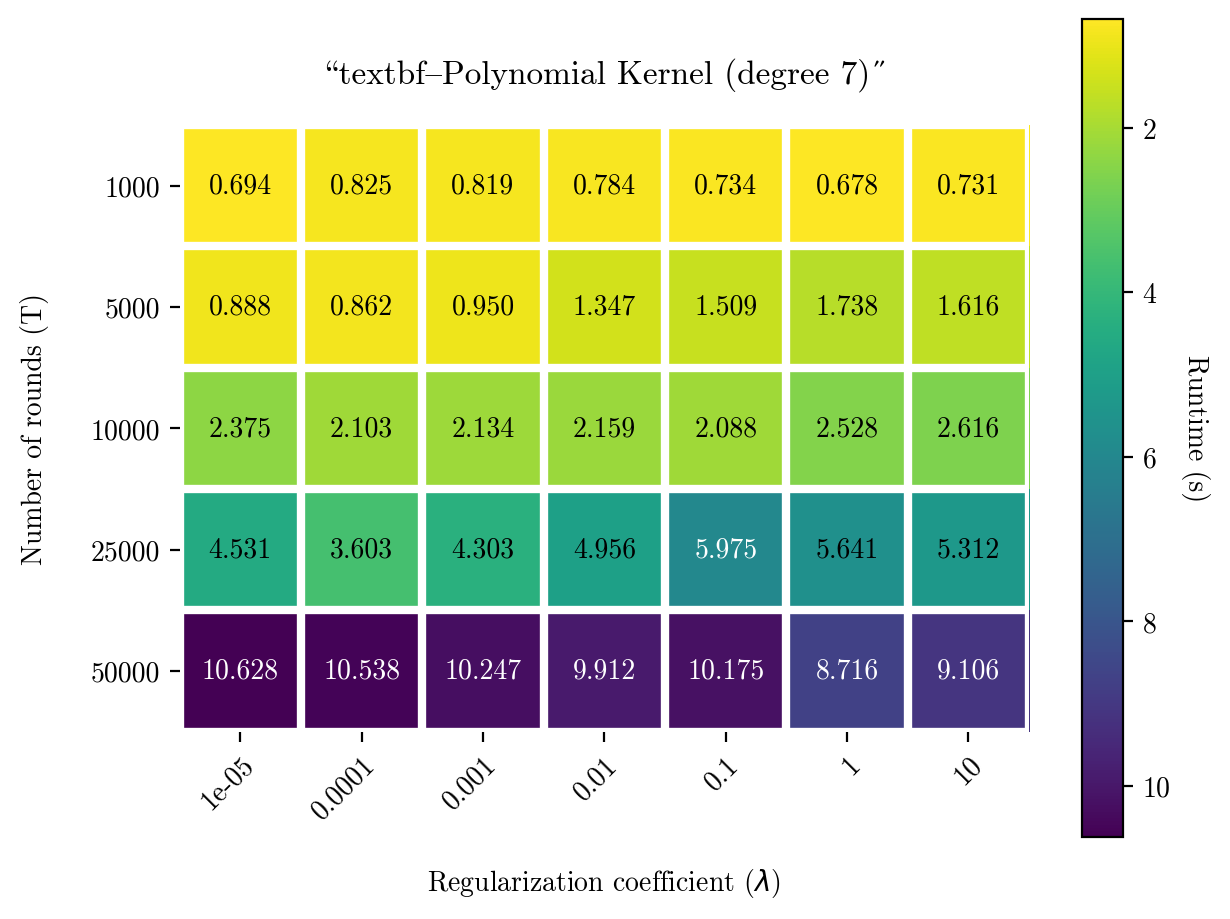

In [40]:
res = ''
with open(r'poly_7.txt','r') as f:
     for i in f.readlines():
         res=i
res = eval(res)

plot_heatmap(
     np.array([val['time'] for val in res.values()]).round(3), 
     param_grid, r'\textbf{Polynomial Kernel (degree 7)}', 
     r'Regularization coefficient ($\lambda$)', 'Number of rounds (T)', 
    'Runtime (s)','img/poly_7_time.png')

## Gaussian kernel (gamma 0.25)

In [41]:
mp = MulticlassPegasos(kernel=GaussianKernel(0.25))
pgcv = ParamGridCrossValidation(mp, param_grid, cv)
res = pgcv.fit(X, y)

Looping on parameters grid:  83%|████████▎ | 29/35 [2:34:13<33:29, 334.84s/it]  

In [ ]:
with open(r'gaussian_25.txt','w+') as f:
    f.write(str(res))

In [ ]:
mp = MulticlassPegasos(kernel=GaussianKernel(0.75))
pgcv = ParamGridCrossValidation(mp, param_grid, cv)
res = pgcv.fit(X, y)

In [ ]:
with open(r'gaussian_75.txt','w+') as f:
    f.write(str(res))

In [ ]:
mp = MulticlassPegasos(kernel=GaussianKernel(2))
pgcv = ParamGridCrossValidation(mp, param_grid, cv)
res = pgcv.fit(X, y)

In [ ]:
with open(r'gaussian_2.txt','w+') as f:
    f.write(str(res))

In [ ]:
N = 1000
N_test = 300
X_train = X_tr[:N]
y_train = y_tr[:N]
X_test = X_te[:N_test]
y_test = y_te[:N_test]

In [ ]:
p = Pegasos(T=16000, kernel=PolynomialKernel())

In [ ]:
p.fit(X_tr, np.where(y_tr == 8, 1, -1))

In [ ]:
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr, y_tr)
X_te = scaler.transform(X_te)

In [ ]:
pca = PCA(0.9)
X_tr = pca.fit_transform(X_tr, y_tr)
X_te = pca.transform(X_te)

pca.n_components_

In [ ]:
mp = MulticlassPegasos(T=32000, kernel=PolynomialKernel(n=5), seed=1)

In [ ]:
mp.fit(X_tr, y_tr)

In [ ]:
mp.score(X_te, y_te)

In [ ]:
KFoldCV = KFoldCrossValidation(5)

In [ ]:
KFoldCV.cross_validate(mp, X_train, y_train)

In [ ]:

res

In [ ]:
with open(r'res.txt','w+') as f:
     f.write(str(res))

In [ ]:
dic = ''
with open(r'res.txt','r') as f:
         for i in f.readlines():
            dic=i
dic = eval(dic)

In [ ]:
plot_error_heatmap(
    dic, param_grid, r'\textbf{Polynomial Kernel (degree 5)}', 
    r'Regularization coefficient ($\lambda$)', 'Number of rounds (T)', 
    'poly_5_error.svg')